In [57]:
import os 
import time
import math
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from string import digits
from PIL import Image
from sklearn import preprocessing
from scipy.spatial import distance
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
#KPCA
from sklearn.decomposition import KernelPCA
#LLE
from sklearn.manifold import LocallyLinearEmbedding
#K-MEANS
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('/Users/parpar/Desktop/Documents/photos/')
os.getcwd()
path = os.listdir("./photos")
picList = []
img_target = []

for i in path:
    getPic = Image.open("./photos/"+i)
    changeSize = getPic.resize((256,256))
    picList.append(np.array(changeSize).reshape(-1))
    category = i.split('_',3)[2]
    img_target.append(np.array(category,dtype=int))
    
    
picListnp = np.array(picList)
picList_scale = preprocessing.scale(picListnp)
dfImage=pd.DataFrame(picList_scale)

img_target = np.array(img_target)
dflabel=pd.DataFrame(img_target)
dflabel=dflabel.rename(columns={0:'label'})

df = pd.concat([dflabel, dfImage], axis=1)
y = df.loc[:,0].values
x = df.loc[:,1:].values

In [24]:
def image_compose(ModelName,imageslist ,index):
    IMAGES_PATH = r'./photos/'  
    IMAGES_FORMAT = ['.jpg']  
    IMAGE_SIZE = 256  
    IMAGE_ROW = int(np.ceil(len(imageslist)/7))  
    IMAGE_COLUMN = 7  

    # Get all the picture names under the picture file
    image_names = imageslist
    to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))  
    # Paste each picture to the corresponding position in order
    for x in range(IMAGE_COLUMN):
        for y in range(IMAGE_ROW):
            img = Image.open(IMAGES_PATH + image_names[IMAGE_COLUMN * (y -1) + x ])
            from_image = img.resize(
                (IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
            to_image.paste(from_image, (x  * IMAGE_SIZE, y  * IMAGE_SIZE))
    return to_image.save(str(ModelName)+'-'+str(n_components)+'-'+str(index+1)+'-Nolebal.jpg')  

In [4]:
def SavePictures(ModelName,Components):
    
    plt.scatter(Components[:, 0],Components[:, 1])
    plt.title(str(ModelName)+'-'+str(n_components)+'-Nolebal')
    plt.savefig(str(ModelName)+'-'+str(n_components)+'-Nolebal.jpg')
    plt.show()
    
    kmeans = KMeans(n_clusters=k,random_state=2)
    a = kmeans.fit(Components)
    print(kmeans.cluster_centers_)
    plt.scatter(Components[:, 0],Components[:, 1],c = a.labels_)
    plt.title(str(ModelName)+'-'+str(n_components)+'-Kmeans')
    plt.savefig(str(ModelName)+'-'+str(n_components)+'-Kmeans.jpg')
    plt.show()

    for i in range(k):
        locals()['clusterlist{0}'.format(i+1)] =[index for index in range(len(a.labels_)) if a.labels_[index] == i]
        print(str(ModelName),' cluster',str(i+1),'=',len(locals()['clusterlist{0}'.format(i+1)]))
        locals()['reslist{0}'.format(i)]=[]
    for index in range(k):
        picscrlist = [path[i] for i in locals()['clusterlist{0}'.format(index+1)]]
        #print(str(ModelName),' cluster',str(index+1),picscrlist)
        for n in picscrlist:
            numberlist = n.split('_',3)[1]
            print(str(ModelName),'cluster',str(index+1),numberlist)
        image_compose(ModelName,picscrlist,index)
        plt.show()
        
    plt.scatter(Components[:, 0],Components[:, 1],c=y,cmap='tab10',label=y)
    plt.title(str(ModelName)+'-'+str(n_components)+'-lebal')
    plt.savefig(str(ModelName)+'-'+str(n_components)+'-lebal.jpg')
    plt.show()

In [30]:
def n_clusters(ModelName, Components):
    SSE = []
    for n in range(3, 10):
        kmeans = KMeans(n_clusters=n, random_state=2)
        a = kmeans.fit(Components)
        centers = kmeans.cluster_centers_.tolist()
        dis = [distance.sqeuclidean(centers[i], centers[j]) for i in range(len(centers)) for j in
               range(i + 1, len(centers))]
        feature = sum(dis) / len(dis) - kmeans.inertia_ / 402
        SSE.append(feature)

    plt.plot(range(3, 10), SSE, marker="o")
    plt.title(str(ModelName) + ' clusters')
    plt.xlabel("K - Number of clusters")
    plt.ylabel("CV - SSE")
    plt.savefig(str(ModelName) + ' clusters')
    plt.show()

In [6]:
n_components=2

In [7]:
ModelNamePCA = 'PCA'
start = time.time()
pca = PCA(n_components)
resultPicPCA = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
print(pca.explained_variance_ratio_)

Duration: 3.1530470848083496 seconds
[0.18653443 0.12944535]


In [8]:
ModelNameKPCA = 'KPCA'
start = time.time()
picKPCA = KernelPCA(n_components,kernel="rbf")
resultPicKPCA = picKPCA.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.0077219009399414 seconds


In [9]:
ModelNameTSNE = 'TSNE'
start = time.time()
picTSNE = TSNE(n_components)
resultPicTSNE = picTSNE.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 3.4176247119903564 seconds


In [10]:
ModelNameUMAP = 'UMAP'
start = time.time()
resultPicUMAP = umap.UMAP(n_components).fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

/Users/parpar/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Duration: 25.829458951950073 seconds


In [11]:
ModelNameLLE = 'LLE'
start = time.time()
picLLE = LocallyLinearEmbedding(n_components)
resultPicLLE = picLLE.fit_transform(df)
print('Duration: {} seconds'.format(time.time() - start))

/Users/parpar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Duration: 7.875070095062256 seconds


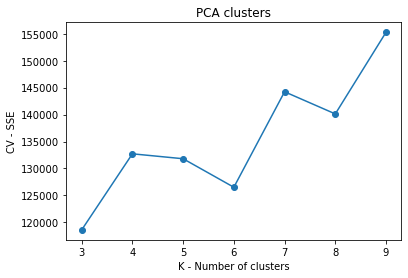

In [36]:
n_clusters(ModelNamePCA,resultPicPCA)

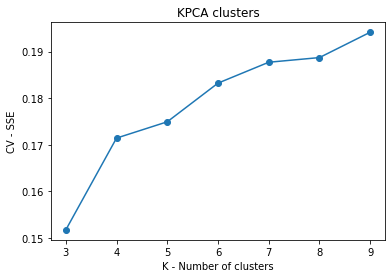

In [37]:
n_clusters(ModelNameKPCA,resultPicKPCA)

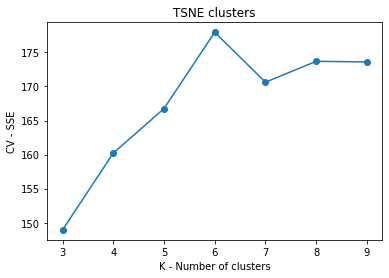

In [38]:
n_clusters(ModelNameTSNE,resultPicTSNE)

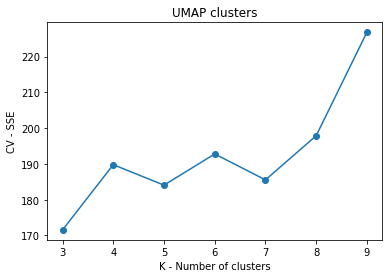

In [39]:
n_clusters(ModelNameUMAP,resultPicUMAP)

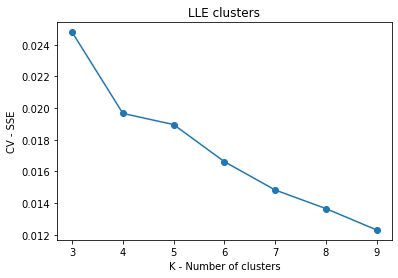

In [40]:
n_clusters(ModelNameLLE,resultPicLLE)

In [17]:
k=int(input("Enter the number of clusters："))

Enter the number of clusters：7


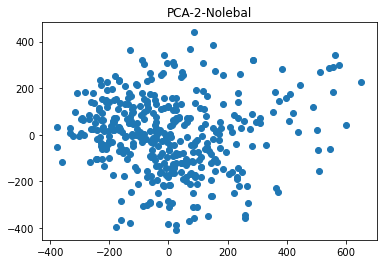

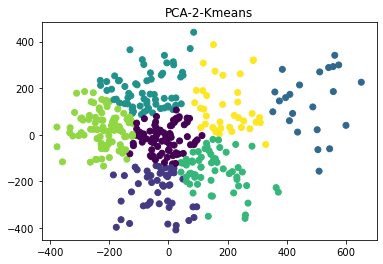

PCA  cluster 1 = 80
PCA  cluster 2 = 48
PCA  cluster 3 = 23
PCA  cluster 4 = 64
PCA  cluster 5 = 60
PCA  cluster 6 = 90
PCA  cluster 7 = 37
PCA cluster 1 031
PCA cluster 1 070
PCA cluster 1 393
PCA cluster 1 019
PCA cluster 1 058
PCA cluster 1 155
PCA cluster 1 234
PCA cluster 1 275
PCA cluster 1 327
PCA cluster 1 197
PCA cluster 1 369
PCA cluster 1 314
PCA cluster 1 354
PCA cluster 1 265
PCA cluster 1 230
PCA cluster 1 253
PCA cluster 1 199
PCA cluster 1 388
PCA cluster 1 133
PCA cluster 1 033
PCA cluster 1 057
PCA cluster 1 266
PCA cluster 1 088
PCA cluster 1 321
PCA cluster 1 153
PCA cluster 1 158
PCA cluster 1 297
PCA cluster 1 397
PCA cluster 1 127
PCA cluster 1 315
PCA cluster 1 306
PCA cluster 1 259
PCA cluster 1 342
PCA cluster 1 210
PCA cluster 1 257
PCA cluster 1 244
PCA cluster 1 278
PCA cluster 1 378
PCA cluster 1 239
PCA cluster 1 191
PCA cluster 1 114
PCA cluster 1 130
PCA cluster 1 071
PCA cluster 1 053
PCA cluster 1 141
PCA cluster 1 041
PCA cluster 1 389
PCA cluster 1 

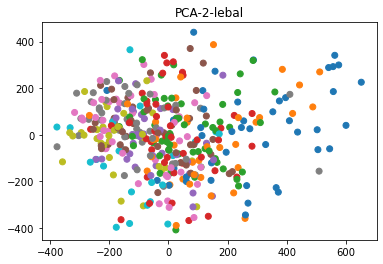

In [25]:
SavePictures(ModelNamePCA,resultPicPCA)

In [ ]:
cluster_centers_

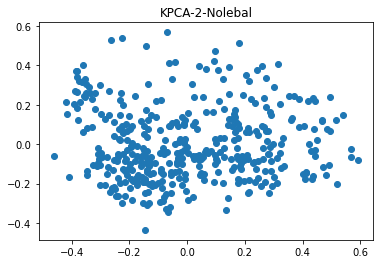

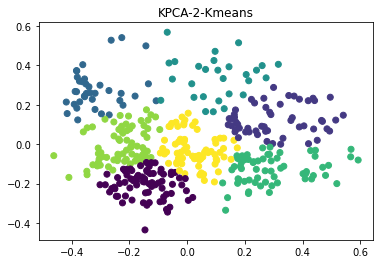

KPCA  cluster 1 = 78
KPCA  cluster 2 = 54
KPCA  cluster 3 = 37
KPCA  cluster 4 = 28
KPCA  cluster 5 = 61
KPCA  cluster 6 = 71
KPCA  cluster 7 = 73
KPCA cluster 1 131
KPCA cluster 1 386
KPCA cluster 1 031
KPCA cluster 1 076
KPCA cluster 1 124
KPCA cluster 1 176
KPCA cluster 1 007
KPCA cluster 1 055
KPCA cluster 1 082
KPCA cluster 1 379
KPCA cluster 1 190
KPCA cluster 1 208
KPCA cluster 1 272
KPCA cluster 1 097
KPCA cluster 1 372
KPCA cluster 1 214
KPCA cluster 1 377
KPCA cluster 1 206
KPCA cluster 1 330
KPCA cluster 1 402
KPCA cluster 1 270
KPCA cluster 1 095
KPCA cluster 1 033
KPCA cluster 1 150
KPCA cluster 1 117
KPCA cluster 1 009
KPCA cluster 1 374
KPCA cluster 1 334
KPCA cluster 1 084
KPCA cluster 1 321
KPCA cluster 1 170
KPCA cluster 1 137
KPCA cluster 1 068
KPCA cluster 1 169
KPCA cluster 1 146
KPCA cluster 1 160
KPCA cluster 1 297
KPCA cluster 1 111
KPCA cluster 1 127
KPCA cluster 1 156
KPCA cluster 1 382
KPCA cluster 1 148
KPCA cluster 1 347
KPCA cluster 1 365
KPCA cluster 1 35

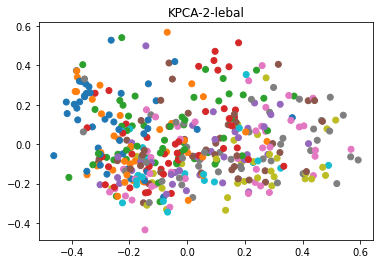

In [26]:
SavePictures(ModelNameKPCA,resultPicKPCA)

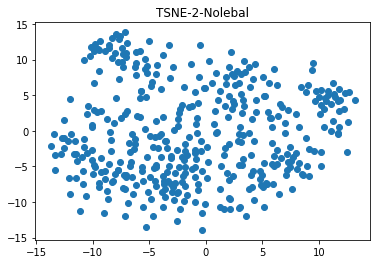

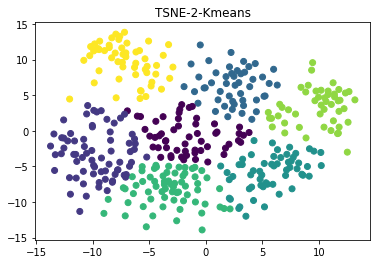

TSNE  cluster 1 = 55
TSNE  cluster 2 = 71
TSNE  cluster 3 = 49
TSNE  cluster 4 = 57
TSNE  cluster 5 = 66
TSNE  cluster 6 = 49
TSNE  cluster 7 = 55
TSNE cluster 1 031
TSNE cluster 1 176
TSNE cluster 1 058
TSNE cluster 1 155
TSNE cluster 1 379
TSNE cluster 1 234
TSNE cluster 1 275
TSNE cluster 1 327
TSNE cluster 1 211
TSNE cluster 1 189
TSNE cluster 1 369
TSNE cluster 1 314
TSNE cluster 1 377
TSNE cluster 1 354
TSNE cluster 1 230
TSNE cluster 1 222
TSNE cluster 1 388
TSNE cluster 1 057
TSNE cluster 1 117
TSNE cluster 1 374
TSNE cluster 1 113
TSNE cluster 1 160
TSNE cluster 1 297
TSNE cluster 1 365
TSNE cluster 1 363
TSNE cluster 1 300
TSNE cluster 1 210
TSNE cluster 1 303
TSNE cluster 1 184
TSNE cluster 1 257
TSNE cluster 1 378
TSNE cluster 1 083
TSNE cluster 1 165
TSNE cluster 1 141
TSNE cluster 1 172
TSNE cluster 1 072
TSNE cluster 1 385
TSNE cluster 1 086
TSNE cluster 1 355
TSNE cluster 1 381
TSNE cluster 1 100
TSNE cluster 1 233
TSNE cluster 1 356
TSNE cluster 1 313
TSNE cluster 1 37

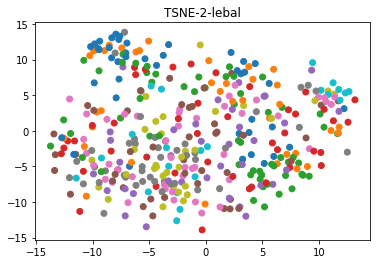

In [27]:
SavePictures(ModelNameTSNE,resultPicTSNE)

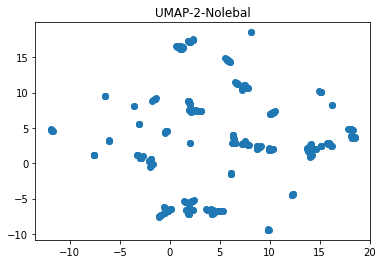

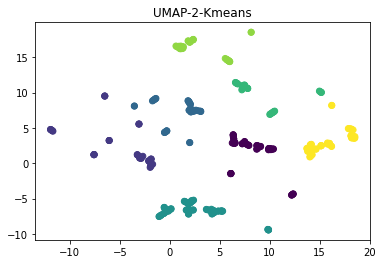

UMAP  cluster 1 = 65
UMAP  cluster 2 = 52
UMAP  cluster 3 = 45
UMAP  cluster 4 = 83
UMAP  cluster 5 = 38
UMAP  cluster 6 = 47
UMAP  cluster 7 = 72
UMAP cluster 1 398
UMAP cluster 1 163
UMAP cluster 1 176
UMAP cluster 1 054
UMAP cluster 1 119
UMAP cluster 1 235
UMAP cluster 1 375
UMAP cluster 1 343
UMAP cluster 1 400
UMAP cluster 1 247
UMAP cluster 1 218
UMAP cluster 1 253
UMAP cluster 1 133
UMAP cluster 1 178
UMAP cluster 1 283
UMAP cluster 1 374
UMAP cluster 1 183
UMAP cluster 1 090
UMAP cluster 1 202
UMAP cluster 1 251
UMAP cluster 1 088
UMAP cluster 1 022
UMAP cluster 1 154
UMAP cluster 1 106
UMAP cluster 1 392
UMAP cluster 1 125
UMAP cluster 1 103
UMAP cluster 1 003
UMAP cluster 1 167
UMAP cluster 1 215
UMAP cluster 1 376
UMAP cluster 1 371
UMAP cluster 1 194
UMAP cluster 1 085
UMAP cluster 1 188
UMAP cluster 1 310
UMAP cluster 1 366
UMAP cluster 1 177
UMAP cluster 1 025
UMAP cluster 1 018
UMAP cluster 1 130
UMAP cluster 1 387
UMAP cluster 1 122
UMAP cluster 1 056
UMAP cluster 1 07

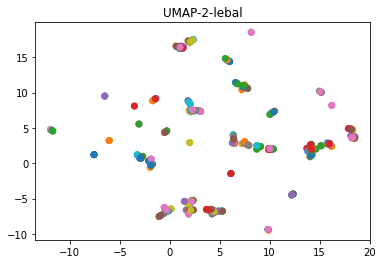

In [28]:
SavePictures(ModelNameUMAP,resultPicUMAP)

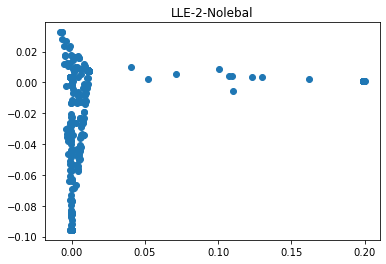

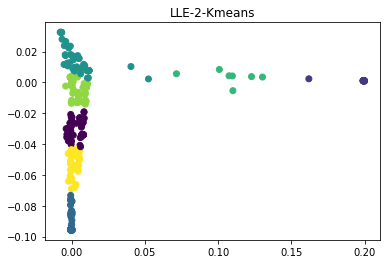

LLE  cluster 1 = 59
LLE  cluster 2 = 23
LLE  cluster 3 = 93
LLE  cluster 4 = 92
LLE  cluster 5 = 7
LLE  cluster 6 = 87
LLE  cluster 7 = 41
LLE cluster 1 163
LLE cluster 1 176
LLE cluster 1 351
LLE cluster 1 314
LLE cluster 1 192
LLE cluster 1 353
LLE cluster 1 253
LLE cluster 1 133
LLE cluster 1 033
LLE cluster 1 040
LLE cluster 1 374
LLE cluster 1 309
LLE cluster 1 185
LLE cluster 1 048
LLE cluster 1 035
LLE cluster 1 039
LLE cluster 1 029
LLE cluster 1 046
LLE cluster 1 292
LLE cluster 1 062
LLE cluster 1 336
LLE cluster 1 268
LLE cluster 1 368
LLE cluster 1 347
LLE cluster 1 371
LLE cluster 1 194
LLE cluster 1 363
LLE cluster 1 210
LLE cluster 1 350
LLE cluster 1 244
LLE cluster 1 366
LLE cluster 1 217
LLE cluster 1 209
LLE cluster 1 191
LLE cluster 1 006
LLE cluster 1 018
LLE cluster 1 387
LLE cluster 1 041
LLE cluster 1 008
LLE cluster 1 030
LLE cluster 1 107
LLE cluster 1 061
LLE cluster 1 034
LLE cluster 1 045
LLE cluster 1 100
LLE cluster 1 325
LLE cluster 1 203
LLE cluster 1 3

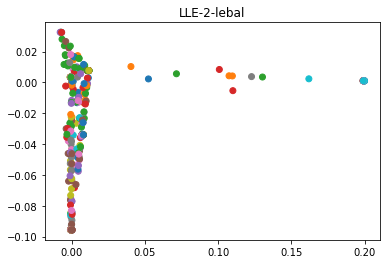

In [29]:
SavePictures(ModelNameLLE,resultPicLLE)

In [47]:
from skimage.measure import compare_ssim as ssim

In [48]:
os.chdir('/Users/parpar/Desktop/Documents/photos/2-7')
os.getcwd()

'/Users/parpar/Desktop/Documents/photos/2-7'

In [65]:
def GroupList (path):
    GroupPath = os.listdir(path)
    picList = []

    for i in GroupPath:
        getPic = Image.open(path+i)
        changeSize = getPic.resize((256,256))
        picList.append(np.array(changeSize).reshape(-1))
        lenList=len(picList)
    return lenList,picList

In [67]:
def GroupSSIM (lenList,picList):
    S=[ssim(i,j) for i in picList for j in picList]
    AverageSSIM = (sum(S)-lenList)/((lenList-1)*lenList)
    print(AverageSSIM)

In [75]:
lenListA,picListA = GroupList ("./A/")
lenListB,picListB = GroupList ("./B/")
lenListC,picListC = GroupList ("./C/")
lenListD,picListD = GroupList ("./D/")
lenListE,picListE = GroupList ("./E/")
lenListF,picListF = GroupList ("./F/")
lenListTest,picListTest = GroupList ("./test/")

In [76]:
GroupSSIM (lenListA,picListA)
GroupSSIM (lenListB,picListB)
GroupSSIM (lenListC,picListC)
GroupSSIM (lenListD,picListD)
GroupSSIM (lenListE,picListE)
GroupSSIM (lenListF,picListF)

0.1703916265618044
0.24364651394667672
0.21564526002871506
0.27610138533764533
0.13358544705877473
0.38625061498635055


In [138]:
lenList1,picList1 = GroupList ("./1/")
Sa=np.mean([ssim(i,j) for i in picList1 for j in picListA])
Sb=np.mean([ssim(i,j) for i in picList1 for j in picListB])
Sc=np.mean([ssim(i,j) for i in picList1 for j in picListC])
Sd=np.mean([ssim(i,j) for i in picList1 for j in picListD])
Se=np.mean([ssim(i,j) for i in picList1 for j in picListE])
Sf=np.mean([ssim(i,j) for i in picList1 for j in picListF])

In [139]:
print(Sa,Sb,Sc,Sd,Se,Sf)

0.2307362235336102 0.16171214570751974 -0.012657262014533507 0.2332666725913337 0.0019892409302410463 0.3464094335933533
